In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Bhati\OneDrive\Desktop\CF\Data Analytics Immersion\Achievement 4\11-Apr-2023 Instacart Basket Analysis'

In [3]:
# Importing Final Data Sets
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_Order_Product_Customer_Dataset.pkl'))
df_dep = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_department.pkl'))

In [4]:
# Create a data dictionary for departments
data_dict = df_dep.set_index('department_id')['department'].to_dict()

In [5]:
# Creating a new column to convert department_id
df['department'] = df['department_id'].map(data_dict)

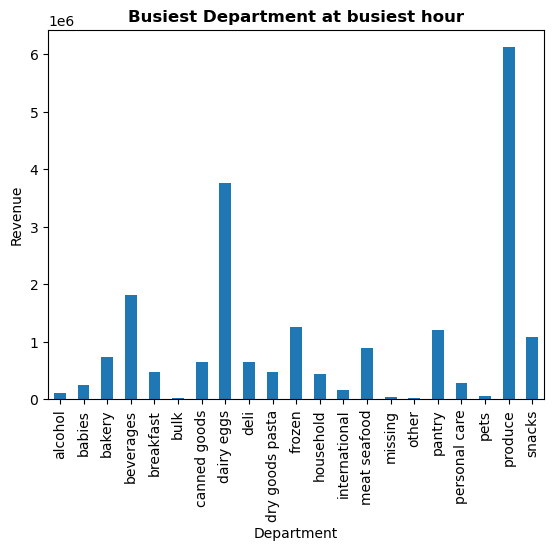

In [8]:
# Creating bar chart for busiest department during busiest hour of the day based on price
busiest_hour_dept = df[df['order_hour_of_day'] == 10]
busiest_hour_dept = busiest_hour_dept.groupby('department')['prices_mod'].sum()
busiest_dept = busiest_hour_dept.plot.bar()
plt.title('Busiest Department at busiest hour', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Revenue')
plt.show()

In [9]:
busiest_hour_dept

department
alcohol             104055.0
babies              253896.5
bakery              738483.0
beverages          1817016.0
breakfast           478361.1
bulk                 24966.5
canned goods        643130.0
dairy eggs         3758632.8
deli                658313.2
dry goods pasta     484339.8
frozen             1251744.1
household           450654.6
international       164954.1
meat seafood        889458.8
missing              47998.5
other                19330.9
pantry             1206985.2
personal care       282699.0
pets                 56311.9
produce            6120756.4
snacks             1080722.9
Name: prices_mod, dtype: float64

In [10]:
crosstab_age_region = pd.crosstab(index=df['region'], columns=df['age_group'], values=df['user_id'], aggfunc=pd.Series.nunique, dropna=False)

In [11]:
crosstab_age_region

age_group,Middle Aged,Senior,Young Adult
region,,,
Midwest,15228,10169,12979
Northeast,11230,7580,9771
South,21054,14433,18706
West,16209,11068,14204


Text(0.5, 0, 'Regions')

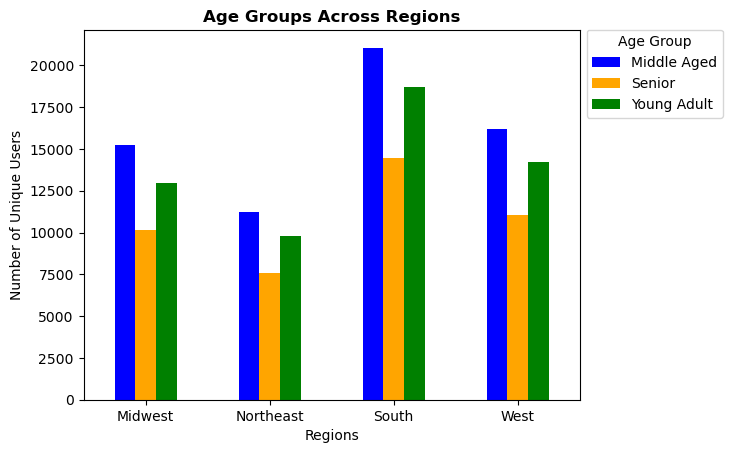

In [12]:
# Creating a bar chart for age_group and region
bar_age_region = crosstab_age_region.plot(kind = 'bar', rot = 0, color = ['blue','orange', 'green'])
bar_age_region.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Age Groups Across Regions', fontweight = 'bold')
plt.ylabel('Number of Unique Users')
plt.xlabel('Regions')

In [13]:
crosstab_income_reg = pd.crosstab(index=df['region'], columns=df['income_group'], values=df['user_id'], aggfunc=pd.Series.nunique, dropna=False)

In [14]:
crosstab_income_reg

income_group,High,Low,Middle
region,,,
Midwest,3040,6372,28964
Northeast,2291,4761,21529
South,4338,9075,40780
West,3341,6923,31217


Text(0.5, 0, 'Regions')

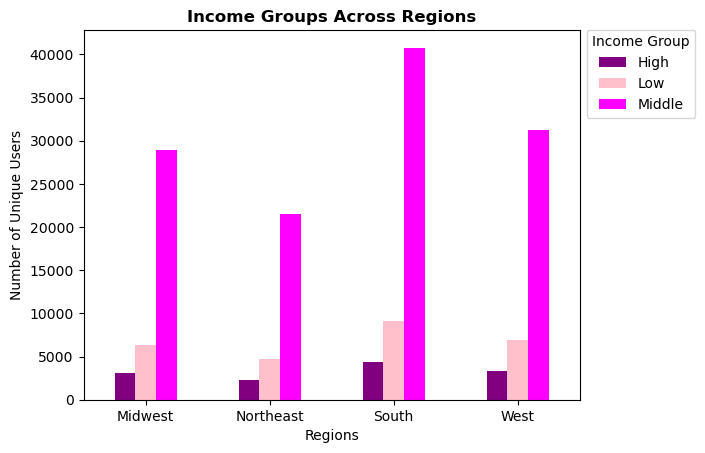

In [18]:
# Creating a bar chart for income group and region
bar_income_region = crosstab_income_reg.plot(kind = 'bar', rot = 0, color = ['purple','pink', 'magenta'])
bar_income_region.legend(title = 'Income Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Income Groups Across Regions', fontweight = 'bold')
plt.ylabel('Number of Unique Users')
plt.xlabel('Regions')

In [16]:
crosstab_family_reg = pd.crosstab(index=df['region'], columns=df['household_size'], values=df['user_id'], aggfunc=pd.Series.nunique, dropna=False)

In [17]:
crosstab_family_reg

household_size,Large Family,Medium Family,Single
region,,,
Midwest,9578,19232,9566
Northeast,7068,14258,7255
South,13598,27058,13537
West,10368,20744,10369


Text(0.5, 0, 'Regions')

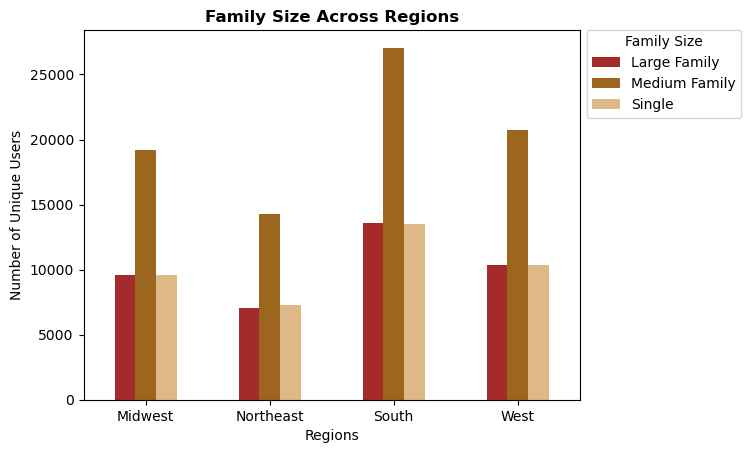

In [19]:
bar_family_region = crosstab_family_reg.plot(kind = 'bar', rot = 0, color = ['#A52A2A','#9C661F', '#DEB887'])
bar_family_region.legend(title = 'Family Size', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Family Size Across Regions', fontweight = 'bold')
plt.ylabel('Number of Unique Users')
plt.xlabel('Regions')

In [25]:
crosstab_family_reg2 = pd.crosstab(
    index=df['region'],
    columns=df['household_size'],
    values=df['prices_mod'].sum(),
    aggfunc='sum',
    dropna=False
)


In [27]:
crosstab_family_reg2

household_size,Large Family,Medium Family,Single
region,,,
Midwest,4.311903e+14,8.809183e+14,4.397621e+14
Northeast,3.332283e+14,6.583755e+14,3.267745e+14
South,6.238506e+14,1.240853e+15,6.229022e+14
West,4.868831e+14,9.478020e+14,4.777919e+14


Text(0.5, 0, 'Regions')

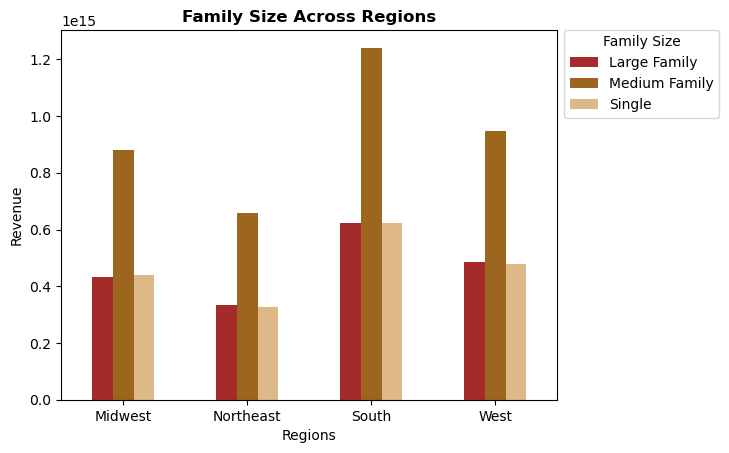

In [28]:
bar_family_region = crosstab_family_reg2.plot(kind = 'bar', rot = 0, color = ['#A52A2A','#9C661F', '#DEB887'])
bar_family_region.legend(title = 'Family Size', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Family Size Across Regions', fontweight = 'bold')
plt.ylabel('Revenue')
plt.xlabel('Regions')

In [29]:
crosstab_income_reg2 = pd.crosstab(
    index=df['region'],
    columns=df['income_group'],
    values=df['prices_mod'].sum(),
    aggfunc='sum',
    dropna=False
)

In [30]:
crosstab_income_reg2

income_group,High,Low,Middle
region,,,
Midwest,1.532519e+14,2.085551e+14,1.390064e+15
Northeast,1.147972e+14,1.564495e+14,1.047132e+15
South,2.219662e+14,3.032720e+14,1.962368e+15
West,1.689761e+14,2.223635e+14,1.521137e+15


Text(0.5, 0, 'Regions')

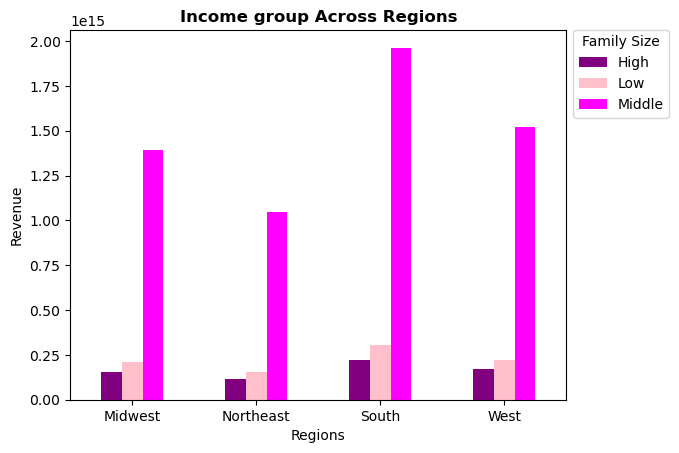

In [36]:
bar_income_region2 = crosstab_income_reg2.plot(kind = 'bar', rot = 0, color = ['purple','pink', 'magenta'])
bar_income_region2.legend(title = 'Family Size', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Income group Across Regions', fontweight = 'bold')
plt.ylabel('Revenue')
plt.xlabel('Regions')

In [33]:
crosstab_age_reg2 = pd.crosstab(
    index=df['region'],
    columns=df['age_group'],
    values=df['prices_mod'].sum(),
    aggfunc='sum',
    dropna=False
)

In [34]:
crosstab_age_reg2

age_group,Middle Aged,Senior,Young Adult
region,,,
Midwest,6.934771e+14,4.593591e+14,5.990345e+14
Northeast,5.085979e+14,3.582160e+14,4.515645e+14
South,9.636733e+14,6.534277e+14,8.705048e+14
West,7.543711e+14,5.062068e+14,6.518991e+14


Text(0.5, 0, 'Regions')

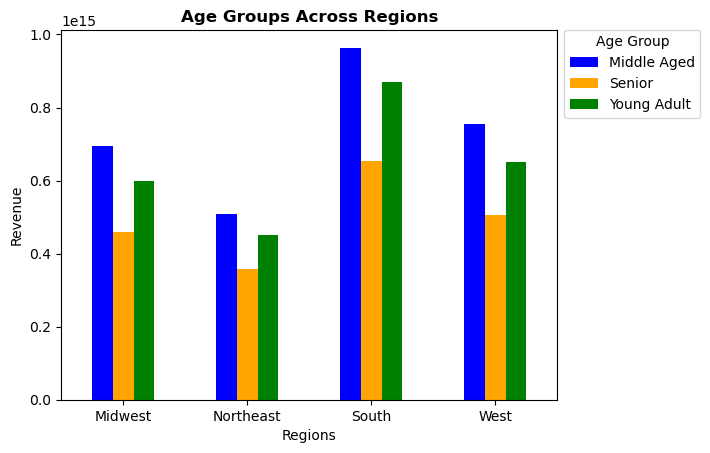

In [35]:
# Creating a bar chart for age_group and region
bar_age_region = crosstab_age_reg2.plot(kind = 'bar', rot = 0, color = ['blue','orange', 'green'])
bar_age_region.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Age Groups Across Regions', fontweight = 'bold')
plt.ylabel('Revenue')
plt.xlabel('Regions')